In [0]:
#chapter 1
from matplotlib import pyplot as plt
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" },
    { "id": 10, "name": "Jen" }
]

In [0]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [0]:
for user in users:
    user["friends"] = []


In [0]:
for i, j in friendships:
    
    users[i]["friends"].append(users[j]) 
    users[j]["friends"].append(users[i]) 


In [0]:
def number_of_friends(user):
    """how many friends does _user_ have?"""
    return len(user["friends"])

In [0]:
total_connections = sum(number_of_friends(user)
                        for user in users)

In [0]:
num_users = len(users)
avg_connections = total_connections / num_users

In [0]:
from collections import Counter


In [0]:
def friends_of_friend_ids_bad(user):
    
    return [foaf["id"]
            for friend in user["friends"] 
            for foaf in friend["friends"]]
  
def not_the_same(user, other_user):
    """two users are not the same if they have different ids"""
    return user["id"] != other_user["id"]
  
def not_friends(user, other_user):
    """other_user is not a friend if he's not in user["friends"];
    that is, if he's not_the_same as all the people in user["friends"]"""
    return all(not_the_same(friend, other_user)
               for friend in user["friends"])
  
def friends_of_friend_ids(user):
    return Counter(foaf["id"]
                   for friend in user["friends"] 
                   for foaf in friend["friends"]  
                   if not_the_same(user, foaf)    
                   and not_friends(user, foaf))

In [29]:
print(friends_of_friend_ids(users[3]))

Counter({0: 8, 5: 4})


In [0]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [0]:
from collections import defaultdict

In [0]:
def data_scientists_who_like(target_interest):
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]

In [0]:
user_ids_by_interest = defaultdict(list)
for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)
    
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [0]:
def most_common_interests_with(user_id):
    return Counter(interested_user_id
        for interest in interests_by_user_id["user_id"]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user_id)

In [0]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

In [0]:
def make_chart_salaries_by_tenure():
    tenures = [tenure for salary, tenure in salaries_and_tenures]
    salaries = [salary for salary, tenure in salaries_and_tenures]
    plt.scatter(tenures, salaries)
    plt.xlabel("Years Experience")
    plt.ylabel("Salary")
    plt.show()

In [0]:
salary_by_tenure = defaultdict(list)

In [0]:
for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

In [0]:
average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

In [0]:
def tenure_bucket(tenure):
    if tenure < 2: return "less than two"
    elif tenure < 5: return "between two and five"
    else: return "more than five"

In [0]:
salary_by_tenure_bucket = defaultdict(list)

In [0]:
for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)
    
average_salary_by_bucket = {
  tenure_bucket : sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}   
  

In [0]:
def predict_paid_or_unpaid(years_experience):
  if years_experience < 3.0: return "paid"
  elif years_experience < 8.5: return "unpaid"
  else: return "paid"

In [0]:
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())

In [49]:
if __name__ == "__main__":

    print("total connections", total_connections)
    print("number of users", num_users)
    print("average connections", total_connections / num_users)
    print()

total connections 48
number of users 11
average connections 4.363636363636363



In [51]:
num_friends_by_id = [(user["id"], number_of_friends(user))
                         for user in users]

print("users sorted by number of friends:")
print(sorted(num_friends_by_id,
                 key=lambda pair: pair[1],       
                 reverse=True))  
  
  

users sorted by number of friends:
[(1, 6), (2, 6), (3, 6), (5, 6), (8, 6), (0, 4), (4, 4), (6, 4), (7, 4), (9, 2), (10, 0)]


In [52]:
print("friends of friends bad for user 0:", friends_of_friend_ids_bad(users[0]))
print("friends of friends for user 3:", friends_of_friend_ids(users[3]))

friends of friends bad for user 0: [0, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 3, 0, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 3]
friends of friends for user 3: Counter({0: 8, 5: 4})


In [53]:
print("average salary by tenure", average_salary_by_tenure)
print("average salary by tenure bucket", average_salary_by_bucket)

average salary by tenure {8.7: 83000.0, 8.1: 88000.0, 0.7: 48000.0, 6: 76000.0, 6.5: 69000.0, 7.5: 76000.0, 2.5: 60000.0, 10: 83000.0, 1.9: 48000.0, 4.2: 63000.0}
average salary by tenure bucket {'more than five': 79166.66666666667, 'less than two': 48000.0, 'between two and five': 61500.0}


In [54]:
 for word, count in words_and_counts.most_common():
        if count > 1:
            print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


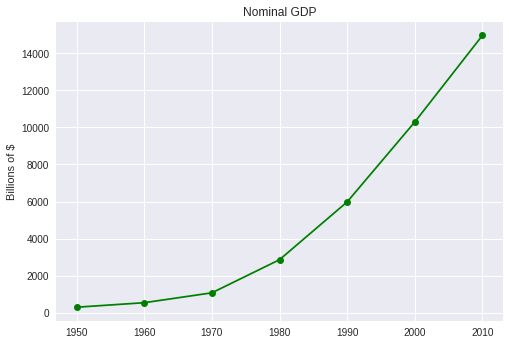

In [84]:
#chapter3

from matplotlib import pyplot as plt
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]
# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
# add a title
plt.title("Nominal GDP")
# add a label to the y-axis
plt.ylabel("Billions of $")
plt.show()

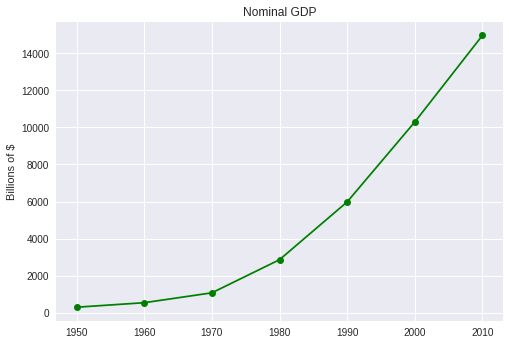

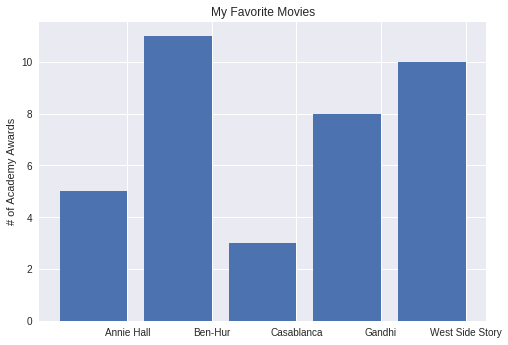

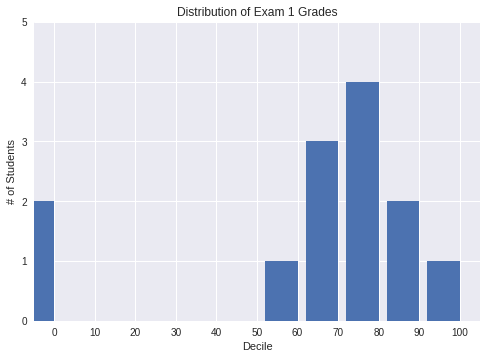

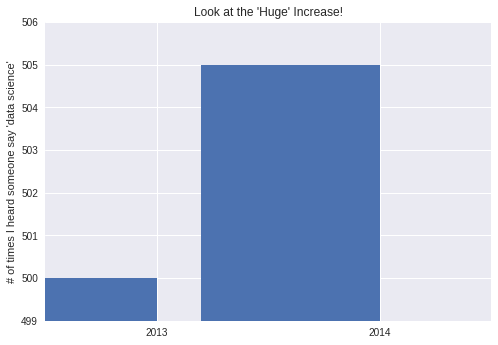

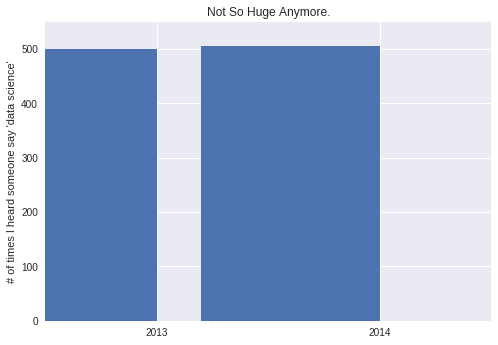

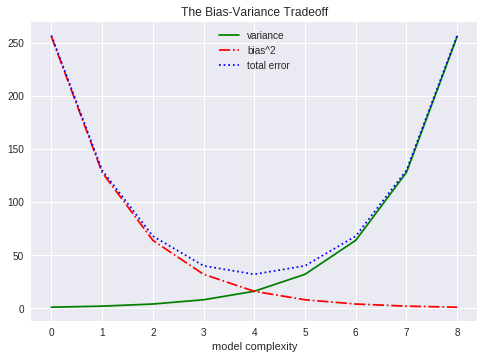

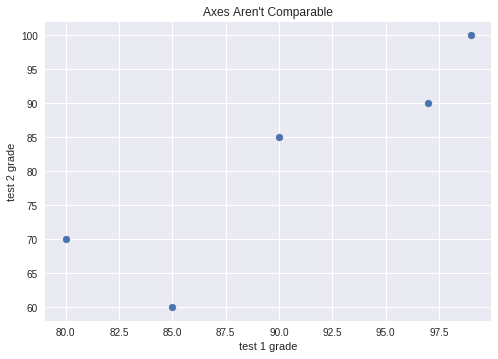

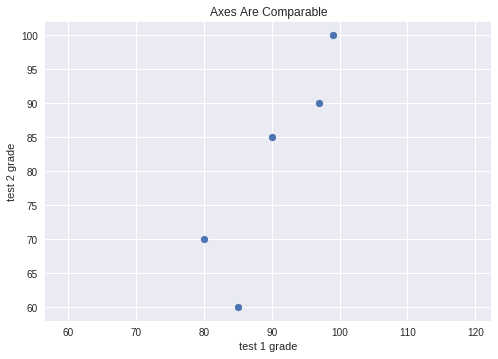

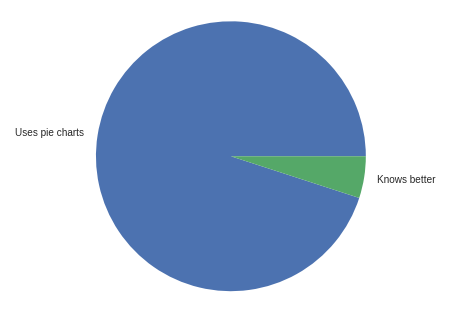

In [85]:

import matplotlib.pyplot as plt
from collections import Counter




def make_chart_simple_bar_chart():

    movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
    num_oscars = [5, 11, 3, 8, 10]

    xs = [i + 0.1 for i, _ in enumerate(movies)]

    plt.bar(xs, num_oscars)
    plt.ylabel("# of Academy Awards")
    plt.title("My Favorite Movies")
    plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
    plt.show()

def make_chart_histogram():
    grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
    decile = lambda grade: grade // 10 * 10
    histogram = Counter(decile(grade) for grade in grades)

    plt.bar([x - 4 for x in histogram.keys()], 
            histogram.values(),                
            8)                                 
    plt.axis([-5, 105, 0, 5])                 
                                               
    plt.xticks([10 * i for i in range(11)])    
    plt.xlabel("Decile")
    plt.ylabel("# of Students")
    plt.title("Distribution of Exam 1 Grades")
    plt.show()

def make_chart_misleading_y_axis(mislead=True):

    mentions = [500, 505]
    years = [2013, 2014]

    plt.bar([2012.6, 2013.6], mentions, 0.8)
    plt.xticks(years)
    plt.ylabel("# of times I heard someone say 'data science'")
    plt.ticklabel_format(useOffset=False)

    if mislead:
        
        plt.axis([2012.5,2014.5,499,506])
        plt.title("Look at the 'Huge' Increase!")
    else:
        plt.axis([2012.5,2014.5,0,550])
        plt.title("Not So Huge Anymore.")
    plt.show()

def make_chart_several_line_charts():

    variance     = [1,2,4,8,16,32,64,128,256]
    bias_squared = [256,128,64,32,16,8,4,2,1]
    total_error  = [x + y for x, y in zip(variance, bias_squared)]

    xs = range(len(variance))

   
    plt.plot(xs, variance,     'g-',  label='variance')    
    plt.plot(xs, bias_squared, 'r-.', label='bias^2')      
    plt.plot(xs, total_error,  'b:',  label='total error') 
    
    plt.legend(loc=9)
    plt.xlabel("model complexity")
    plt.title("The Bias-Variance Tradeoff")
    plt.show()

def make_chart_scatter_plot():

    friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
    minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
    labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

    plt.scatter(friends, minutes)

   
    for label, friend_count, minute_count in zip(labels, friends, minutes):
        plt.annotate(label,
                     xy=(friend_count, minute_count), # put the label with its point
                     xytext=(5, -5), # but slightly offset
                     textcoords='offset points')

    plt.title("Daily Minutes vs. Number of Friends")
    plt.xlabel("# of friends")
    plt.ylabel("daily minutes spent on the site")
    plt.show()

def make_chart_scatterplot_axes(equal_axes=False):

    test_1_grades = [ 99, 90, 85, 97, 80]
    test_2_grades = [100, 85, 60, 90, 70]

    plt.scatter(test_1_grades, test_2_grades)
    plt.xlabel("test 1 grade")
    plt.ylabel("test 2 grade")

    if equal_axes:
        plt.title("Axes Are Comparable")
        plt.axis("equal")
    else:
        plt.title("Axes Aren't Comparable")

    plt.show()

def make_chart_pie_chart():

    plt.pie([0.95, 0.05], labels=["Uses pie charts", "Knows better"])
    plt.axis("equal")
    plt.show()


if __name__ == "__main__":

    make_chart_simple_line_chart()

    make_chart_simple_bar_chart()

    make_chart_histogram()

    make_chart_misleading_y_axis(mislead=True)

    make_chart_misleading_y_axis(mislead=False)

    make_chart_several_line_charts()

    make_chart_scatterplot_axes(equal_axes=False)

    make_chart_scatterplot_axes(equal_axes=True)

    make_chart_pie_chart()

In [0]:
#Chapter 4
import re, math, random 
import matplotlib.pyplot as plt 
from collections import defaultdict, Counter
from functools import partial, reduce

def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]
  
def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def vector_sum(vectors):
    return reduce(vector_add, vectors)
  
def scalar_multiply(c, v):
    return [c * v_i for v_i in v]
  
def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))
  
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))
  
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)
  
def magnitude(v):
    return math.sqrt(sum_of_squares(v))
  
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))
  
def distance(v, w):
  return math.sqrt(squared_distance(v, w))

def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols
  
def get_row(A, i):
  return A[i]

def get_column(A, j):
    return [A_i[j] for A_i in A]

def make_matrix(num_rows, num_cols, entry_fn):
    """returns a num_rows x num_cols matrix
    whose (i,j)-th entry is entry_fn(i, j)"""
    return [[entry_fn(i, j) for j in range(num_cols)]
            for i in range(num_rows)]

  
def is_diagonal(i, j):
    """1's on the 'diagonal', 0's everywhere else"""
    return 1 if i == j else 0
  


In [0]:
identity_matrix = make_matrix(5, 5, is_diagonal)

In [0]:
friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 
               [1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
               [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], 
               [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], 
               [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], 
               [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], 
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 
               [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], 
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] 

In [0]:
def matrix_add(A, B):
    if shape(A) != shape(B):
        raise ArithmeticError("cannot add matrices with different shapes")

    num_rows, num_cols = shape(A)
    def entry_fn(i, j): return A[i][j] + B[i][j]

    return make_matrix(num_rows, num_cols, entry_fn)
  
def matrix_add(A, B):
    if shape(A) != shape(B):
        raise ArithmeticError("cannot add matrices with different shapes")

    num_rows, num_cols = shape(A)
    def entry_fn(i, j): return A[i][j] + B[i][j]

    return make_matrix(num_rows, num_cols, entry_fn)
  
 


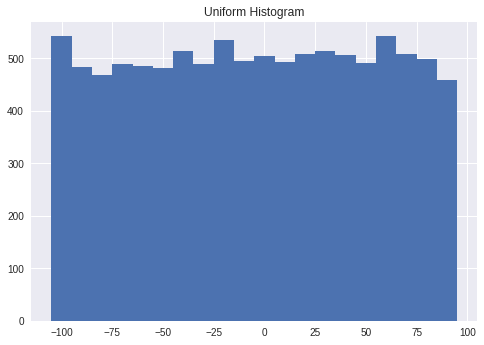

In [87]:
#Chapter10

  
import random
from scipy.stats import norm


def bucketize(point, bucket_size):
  """floor the point to the next lower multiple of bucket_size"""
  return bucket_size * math.floor(point / bucket_size)

def make_histogram(points, bucket_size):
  """buckets the points and counts how many in each bucket"""
  return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points, bucket_size, title=""):
  histogram = make_histogram(points, bucket_size)
  plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
  plt.title(title)
  plt.show()
  
  

random.seed(0)
# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]
# normal distribution with mean 0, standard deviation 57
normal = [57 * norm.cdf(random.random())
          for _ in range(10000)]

plot_histogram(uniform, 10, "Uniform Histogram")
plot_histogram(normal, 10, "Normal Histogram")


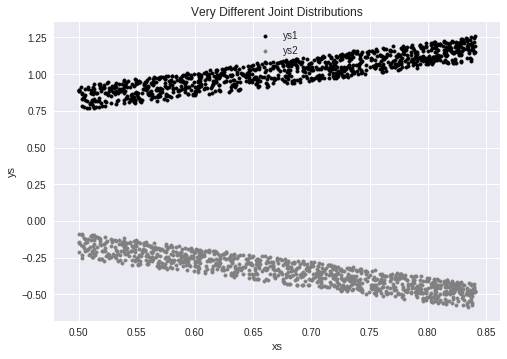

In [88]:
def random_normal():
 """returns a random draw from a standard normal distribution"""
 return norm.cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]


plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

In [90]:
def make_histogram(points, bucket_size):
    """buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)
  
def make_histogram(points, bucket_size):
    """buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)
  
  
def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()
    
def compare_two_distributions():

    random.seed(0)

    uniform = [random.randrange(-100,101) for _ in range(200)]
    normal = [57 * inverse_normal_cdf(random.random())
              for _ in range(200)]

    plot_histogram(uniform, 10, "Uniform Histogram")
    plot_histogram(normal, 10, "Normal Histogram")

    
def random_normal():
    """returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())   
  
def scatter():
    plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
    plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
    plt.xlabel('xs')
    plt.ylabel('ys')
    plt.legend(loc=9)
    plt.show()
    
def correlation_matrix(data):
    """returns the num_columns x num_columns matrix whose (i, j)th entry
    is the correlation between columns i and j of data"""

    _, num_columns = shape(data)    

def matrix_entry(i, j):
        return correlation(get_column(data, i), get_column(data, j))

    return make_matrix(num_columns, num_columns, matrix_entry)
  
def make_scatterplot_matrix():
    num_points = 100
    
def random_row():
        row = [None, None, None, None]
        row[0] = random_normal()
        row[1] = -5 * row[0] + random_normal()
        row[2] = row[0] + row[1] + 5 * random_normal()
        row[3] = 6 if row[2] > -2 else 0
        return row
    random.seed(0)
    data = [random_row()
            for _ in range(num_points)] 
    
   


IndentationError: ignored

In [0]:
import math, random, csv
from collections import Counter, defaultdict
from functools import partial, reduce
import matplotlib.pyplot as plt
import dateutil.parser
from linear_algebra import shape, get_row, get_column, make_matrix, \
    vector_mean, vector_sum, dot, magnitude, vector_subtract, scalar_multiply
from stats import correlation, standard_deviation, mean
from probability import inverse_normal_cdf
from gradient_descent import maximize_batch

In [0]:
xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

In [0]:
 
 _, num_columns = shape(data)
fig, ax = plt.subplots(num_columns, num_columns)


for i in range(num_columns):
        for j in range(num_columns):

            # scatter column_j on the x-axis vs column_i on the y-axis
            if i != j: ax[i][j].scatter(get_column(data, j), get_column(data, i))

            # unless i == j, in which case show the series name
            else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                                    xycoords='axes fraction',
                                    ha="center", va="center")

              
              
              
if i < num_columns - 1: ax[i][j].xaxis.set_visible(False)
            if j > 0: ax[i][j].yaxis.set_visible(False)
      
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

plt.show()

In [0]:
def parse_row(input_row, parsers):
    """given a list of parsers (some of which may be None)
    apply the appropriate one to each element of the input_row"""
    return [parser(value) if parser is not None else value
            for value, parser in zip(input_row, parsers)]
  
def parse_rows_with(reader, parsers):
    """wrap a reader to apply the parsers to each of its rows"""
    for row in reader:
        yield parse_row(row, parsers)
        
def try_or_none(f):
    """wraps f to return None if f raises an exception
    assumes f takes only one input"""
    def f_or_none(x):
        try: return f(x)
        except: return None
    return f_or_none
  
def parse_row(input_row, parsers):
    return [try_or_none(parser)(value) if parser is not None else value
            for value, parser in zip(input_row, parsers)]
  
def try_parse_field(field_name, value, parser_dict):
    """try to parse value using the appropriate function from parser_dict"""
    parser = parser_dict.get(field_name) # None if no such entry
    if parser is not None:
        return try_or_none(parser)(value)
    else:
        return value
      
def parse_dict(input_dict, parser_dict):
    return { field_name : try_parse_field(field_name, value, parser_dict)
             for field_name, value in input_dict.items() }

  
def picker(field_name):
    """returns a function that picks a field out of a dict"""
    return lambda row: row[field_name]
  
def pluck(field_name, rows):
    """turn a list of dicts into the list of field_name values"""
    return map(picker(field_name), rows)  
  
  
def group_by(grouper, rows, value_transform=None):
    # key is output of grouper, value is list of rows
    grouped = defaultdict(list)
    for row in rows:
        grouped[grouper(row)].append(row)
    if value_transform is None:
        return grouped
    else:
        return { key : value_transform(rows)
                 for key, rows in grouped.items() }
      
      
def percent_price_change(yesterday, today):
    return today["closing_price"] / yesterday["closing_price"] - 1
  
def day_over_day_changes(grouped_rows):
    # sort the rows by date
    ordered = sorted(grouped_rows, key=picker("date"))
    # zip with an offset to get pairs of consecutive days
    return [{ "symbol" : today["symbol"],
              "date" : today["date"],
              "change" : percent_price_change(yesterday, today) }
             for yesterday, today in zip(ordered, ordered[1:])]
  
  
def scale(data_matrix):
    num_rows, num_cols = shape(data_matrix)
    means = [mean(get_column(data_matrix,j))
             for j in range(num_cols)]
    stdevs = [standard_deviation(get_column(data_matrix,j))
              for j in range(num_cols)]
    return means, stdevs
  
  
def rescale(data_matrix):
    """rescales the input data so that each column
    has mean 0 and standard deviation 1
    ignores columns with no deviation"""
    means, stdevs = scale(data_matrix)
    
def rescaled(i, j):
        if stdevs[j] > 0:
            return (data_matrix[i][j] - means[j]) / stdevs[j]
        else:
            return data_matrix[i][j] 
    


In [0]:
X = [
    [20.9666776351559,-13.1138080189357],
    [22.7719907680008,-19.8890894944696],
    [25.6687103160153,-11.9956004517219],
    [18.0019794950564,-18.1989191165133],
    [21.3967402102156,-10.8893126308196],
    [0.443696899177716,-19.7221132386308],
    [29.9198322142127,-14.0958668502427],
    [19.0805843080126,-13.7888747608312],
    [16.4685063521314,-11.2612927034291],
    [21.4597664701884,-12.4740034586705],
    [3.87655283720532,-17.575162461771],
    [34.5713920556787,-10.705185165378],
    [13.3732115747722,-16.7270274494424],
    [20.7281704141919,-8.81165591556553],
    [24.839851437942,-12.1240962157419],
    [20.3019544741252,-12.8725060780898],
    [21.9021426929599,-17.3225432396452],
    [23.2285885715486,-12.2676568419045],
    [28.5749111681851,-13.2616470619453],
    [29.2957424128701,-14.6299928678996],
    [15.2495527798625,-18.4649714274207],
    [26.5567257400476,-9.19794350561966],
    [30.1934232346361,-12.6272709845971],
    [36.8267446011057,-7.25409849336718],
    [32.157416823084,-10.4729534347553],
    [5.85964365291694,-22.6573731626132],
    [25.7426190674693,-14.8055803854566],
    [16.237602636139,-16.5920595763719],
    [14.7408608850568,-20.0537715298403],
    [6.85907008242544,-18.3965586884781],
    [26.5918329233128,-8.92664811750842],
    [-11.2216019958228,-27.0519081982856],
    [8.93593745011035,-20.8261235122575],
    [24.4481258671796,-18.0324012215159],
    [2.82048515404903,-22.4208457598703],
    [30.8803004755948,-11.455358009593],
    [15.4586738236098,-11.1242825084309],
    [28.5332537090494,-14.7898744423126],
    [40.4830293441052,-2.41946428697183],
    [15.7563759125684,-13.5771266003795],
    [19.3635588851727,-20.6224770470434],
    [13.4212840786467,-19.0238227375766],
    [7.77570680426702,-16.6385739839089],
    [21.4865983854408,-15.290799330002],
    [12.6392705930724,-23.6433305964301],
    [12.4746151388128,-17.9720169566614],
    [23.4572410437998,-14.602080545086],
    [13.6878189833565,-18.9687408182414],
    [15.4077465943441,-14.5352487124086],
    [20.3356581548895,-10.0883159703702],
    [20.7093833689359,-12.6939091236766],
    [11.1032293684441,-14.1383848928755],
    [17.5048321498308,-9.2338593361801],
    [16.3303688220188,-15.1054735529158],
    [26.6929062710726,-13.306030567991],
    [34.4985678099711,-9.86199941278607],
    [39.1374291499406,-10.5621430853401],
    [21.9088956482146,-9.95198845621849],
    [22.2367457578087,-17.2200123442707],
    [10.0032784145577,-19.3557700653426],
    [14.045833906665,-15.871937521131],
    [15.5640911917607,-18.3396956121887],
    [24.4771926581586,-14.8715313479137],
    [26.533415556629,-14.693883922494],
    [12.8722580202544,-21.2750596021509],
    [24.4768291376862,-15.9592080959207],
    [18.2230748567433,-14.6541444069985],
    [4.1902148367447,-20.6144032528762],
    [12.4332594022086,-16.6079789231489],
    [20.5483758651873,-18.8512560786321],
    [17.8180560451358,-12.5451990696752],
    [11.0071081078049,-20.3938092335862],
    [8.30560561422449,-22.9503944138682],
    [33.9857852657284,-4.8371294974382],
    [17.4376502239652,-14.5095976075022],
    [29.0379635148943,-14.8461553663227],
    [29.1344666599319,-7.70862921632672],
    [32.9730697624544,-15.5839178785654],
    [13.4211493998212,-20.150199857584],
    [11.380538260355,-12.8619410359766],
    [28.672631499186,-8.51866271785711],
    [16.4296061111902,-23.3326051279759],
    [25.7168371582585,-13.8899296143829],
    [13.3185154732595,-17.8959160024249],
    [3.60832478605376,-25.4023343597712],
    [39.5445949652652,-11.466377647931],
    [25.1693484426101,-12.2752652925707],
    [25.2884257196471,-7.06710309184533],
    [6.77665715793125,-22.3947299635571],
    [20.1844223778907,-16.0427471125407],
    [25.5506805272535,-9.33856532270204],
    [25.1495682602477,-7.17350567090738],
    [15.6978431006492,-17.5979197162642],
    [37.42780451491,-10.843637288504],
    [22.974620174842,-10.6171162611686],
    [34.6327117468934,-9.26182440487384],
    [34.7042513789061,-6.9630753351114],
    [15.6563953929008,-17.2196961218915],
    [25.2049825789225,-14.1592086208169]
]

In [0]:
def de_mean_matrix(A):
    """returns the result of subtracting from every value in A the mean
    value of its column. the resulting matrix has mean 0 in every column"""
    nr, nc = shape(A)
    column_means, _ = scale(A)
    return make_matrix(nr, nc, lambda i, j: A[i][j] - column_means[j])
  
def direction(w):
    mag = magnitude(w)
    return [w_i / mag for w_i in w]
  
def direction(w):
    mag = magnitude(w)
    return [w_i / mag for w_i in w] 

def directional_variance_i(x_i, w):
    """the variance of the row x_i in the direction w"""
    return dot(x_i, direction(w)) ** 2
  
  
def directional_variance(X, w):
    """the variance of the data in the direction w"""
    return sum(directional_variance_i(x_i, w) for x_i in X)
  
def directional_variance_gradient_i(x_i, w):
    """the contribution of row x_i to the gradient of
    the direction-w variance"""
    projection_length = dot(x_i, direction(w))
    return [2 * projection_length * x_ij for x_ij in x_i]  
  
  
def directional_variance_gradient(X, w):
    return vector_sum(directional_variance_gradient_i(x_i,w) for x_i in X)
  
  
  
  
def first_principal_component(X):
    guess = [1 for _ in X[0]]
    unscaled_maximizer = maximize_batch(
        partial(directional_variance, X),           
        partial(directional_variance_gradient, X),  
        guess)
    return direction(unscaled_maximizer)
  
  
def first_principal_component_sgd(X):
    guess = [1 for _ in X[0]]
    unscaled_maximizer = maximize_stochastic(
        lambda x, _, w: directional_variance_i(x, w),
        lambda x, _, w: directional_variance_gradient_i(x, w),
        X, [None for _ in X], guess)
    return direction(unscaled_maximizer)
  
  
def project(v, w):
    """return the projection of v onto w"""
    coefficient = dot(v, w)
    return scalar_multiply(coefficient, w)
  
  
def remove_projection_from_vector(v, w):
    """projects v onto w and subtracts the result from v"""
    return vector_subtract(v, project(v, w))
  
  
def remove_projection(X, w):
    """for each row of X
    projects the row onto w, and subtracts the result from the row"""
    return [remove_projection_from_vector(x_i, w) for x_i in X]

  
def principal_component_analysis(X, num_components):
    components = []
    for _ in range(num_components):
        component = first_principal_component(X)
        components.append(component)
        X = remove_projection(X, component)

    return components
  
def transform_vector(v, components):
    return [dot(v, w) for w in components] 
  
  
def transform(X, components):
    return [transform_vector(x_i, components) for x_i in X]
  

  

In [0]:
data = []

with open("comma_delimited_stock_prices.csv", "r", encoding='utf8', newline='') as f:
        reader = csv.reader(f)
        for line in parse_rows_with(reader, [dateutil.parser.parse, None, float]):
            data.append(line)
          
Y = de_mean_matrix(X)
components = principal_component_analysis(Y, 2)
print("principal components", components)
print("first point", Y[0])
print("first point transformed", transform_vector(Y[0], components))